In [1]:
from matplotlib import pyplot
from fbprophet import Prophet
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv('./data/data-octubre.csv',sep=';',decimal=",")

# Prep

In [3]:
df.columns=['Periodo','monto']
df['monto']=df['monto'].apply(lambda x: round(x/1000000, 2))
metrics=[]

In [4]:
def get_str_periodos(per_number):
    min_ = str(per_number)
    min_str=min_[0:4]+'-'+min_[4:6]
    return_index=pd.to_datetime(min_str,format='%Y-%m',errors='coerce')
    return return_index


df['return_index']=df['Periodo'].apply(lambda x: get_str_periodos(x))   
df_prophet=df[['return_index','monto']] 
df_prophet.columns=['ds','y']

In [5]:
df_prophet['SMA3']=df_prophet['y'].rolling(min_periods=1,window = 3).mean()
df_prophet['SMA6']=df_prophet['y'].rolling(min_periods=1,window = 6).mean()
df_prophet['SMA9']=df_prophet['y'].rolling(min_periods=1,window = 9).mean()
df_prophet['STD3']=df_prophet['y'].rolling(min_periods=1,window = 3).std().fillna(0)

<AxesSubplot:>

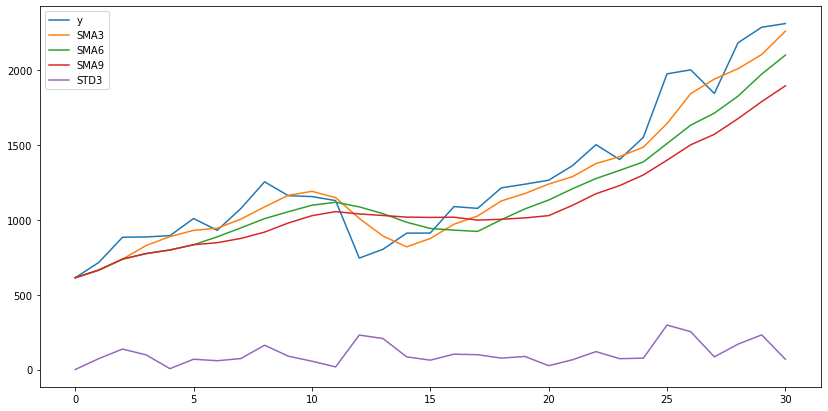

In [6]:
df_prophet[['y','SMA3','SMA6','SMA9','STD3']].plot(figsize=(14, 7))

In [7]:
df_prophet.head()

,ds,y,SMA3,SMA6,SMA9,STD3
0,2019-04-01,613.57,613.570000,613.570000,613.570000,0.000000
1,2019-05-01,716.69,665.130000,665.130000,665.130000,72.916851
2,2019-06-01,884.65,738.303333,738.303333,738.303333,136.826327
3,2019-07-01,886.73,829.356667,775.410000,775.410000,97.577738
4,2019-08-01,895.10,888.826667,799.348000,799.348000,5.531513


In [8]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

def getMetrics(df_1,df2):
    df_joined=pd.merge(df_1,df2,on='ds')
    y_true = df_joined['y'].values
    y_pred = df_joined['yhat'].values


    mae = mean_absolute_error(y_true, y_pred)
    mape=MAPE(y_true,y_pred)
    print('MAE: %.3f' % mae)
    print('MAPE: %.3f' % mape)
    
    return mae,mape    

In [9]:
model = Prophet(interval_width = 0.95)
model.fit(df_prophet[['ds','y']])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.



Initial log joint probability = -47.549
Iteration  1. Log joint probability =    29.3932. Improved by 76.9421.
Iteration  2. Log joint probability =    44.5628. Improved by 15.1696.
Iteration  3. Log joint probability =    50.8861. Improved by 6.32334.
Iteration  4. Log joint probability =    57.6856. Improved by 6.79946.
Iteration  5. Log joint probability =    60.0275. Improved by 2.34197.
Iteration  6. Log joint probability =    60.0491. Improved by 0.021516.
Iteration  7. Log joint probability =     60.304. Improved by 0.254933.
Iteration  8. Log joint probability =     60.313. Improved by 0.00902525.
Iteration  9. Log joint probability =     60.346. Improved by 0.0329925.
Iteration 10. Log joint probability =      60.37. Improved by 0.0240232.
Iteration 11. Log joint probability =    60.4173. Improved by 0.0472421.
Iteration 12. Log joint probability =    60.4275. Improved by 0.0102625.
Iteration 13. Log joint probability =    60.4381. Improved by 0.0105323.
Iteration 14. Log joi

In [10]:
future = model.make_future_dataframe(periods=4,freq='MS')

MAE: 64.741
MAPE: 5.658


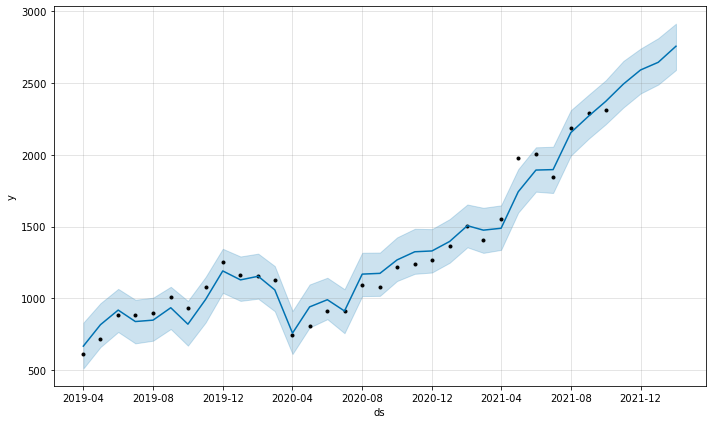

In [11]:
forecast = model.predict(future)
mae,mape = getMetrics(df_prophet,forecast)
model.plot(forecast)
pyplot.show()
metrics.append(('Sin Reg',mae,mape))

In [12]:
df_prophet.head()

,ds,y,SMA3,SMA6,SMA9,STD3
0,2019-04-01,613.57,613.570000,613.570000,613.570000,0.000000
1,2019-05-01,716.69,665.130000,665.130000,665.130000,72.916851
2,2019-06-01,884.65,738.303333,738.303333,738.303333,136.826327
3,2019-07-01,886.73,829.356667,775.410000,775.410000,97.577738
4,2019-08-01,895.10,888.826667,799.348000,799.348000,5.531513


In [13]:
#Version con regresores
model_fbp = Prophet()
exogenous_features = ["SMA3","SMA6",'SMA9']

for feature in exogenous_features:
    model_fbp.add_regressor(feature)
    

model_fbp.fit(df_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.



Initial log joint probability = -57.2135
Iteration  1. Log joint probability =    29.1801. Improved by 86.3936.
Iteration  2. Log joint probability =    45.8405. Improved by 16.6604.
Iteration  3. Log joint probability =    60.3501. Improved by 14.5097.
Iteration  4. Log joint probability =    74.9887. Improved by 14.6386.
Iteration  5. Log joint probability =    79.5109. Improved by 4.52215.
Iteration  6. Log joint probability =    80.4151. Improved by 0.90425.
Iteration  7. Log joint probability =    85.3645. Improved by 4.94937.
Iteration  8. Log joint probability =    85.4213. Improved by 0.0567545.
Iteration  9. Log joint probability =    85.4306. Improved by 0.00935189.
Iteration 10. Log joint probability =    85.4374. Improved by 0.00680636.
Iteration 11. Log joint probability =    85.4552. Improved by 0.017734.
Iteration 12. Log joint probability =    85.4946. Improved by 0.0394408.
Iteration 13. Log joint probability =    85.5876. Improved by 0.0930323.
Iteration 14. Log join

MAE: 39.754
MAPE: 3.454


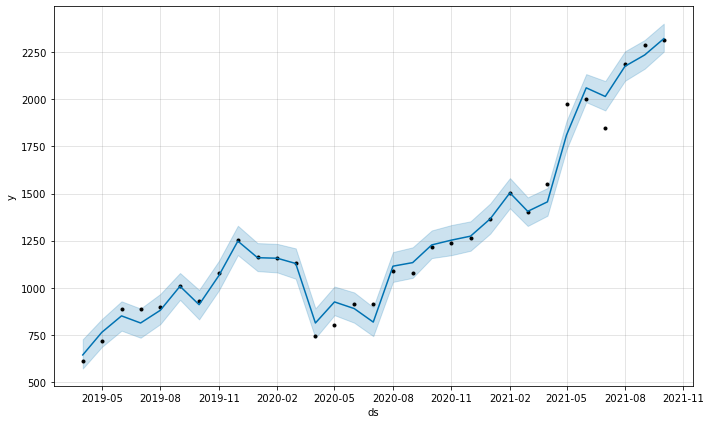

In [14]:
forecast = model_fbp.predict(df_prophet)
mae,mape=getMetrics(df_prophet,forecast)
model.plot(forecast)
pyplot.show()
metrics.append(('Con Reg',mae,mape))

In [15]:
df_metrics = pd.DataFrame(metrics,columns=['Detalle','Mae','Mape'])
df_metrics

,Detalle,Mae,Mape
0,Sin Reg,64.740755,5.658407
1,Con Reg,39.754478,3.453724
